# Next two cells create dictionaries of biggest losers and gainers

In [51]:
#Getting biggest gainers for the day

#!/usr/bin/env python
try:
    # For Python 3.0 and later
    from urllib.request import urlopen
except ImportError:
    # Fall back to Python 2's urllib2
    from urllib2 import urlopen

import json

def get_jsonparsed_data(url):

    response = urlopen(url)
    data = response.read().decode("utf-8")
    return json.loads(data)

url = "https://financialmodelingprep.com/api/v3/stock/gainers"
gainers = get_jsonparsed_data(url)

In [52]:
#and biggest losers

#!/usr/bin/env python
try:
    # For Python 3.0 and later
    from urllib.request import urlopen
except ImportError:
    # Fall back to Python 2's urllib2
    from urllib2 import urlopen

import json

def get_jsonparsed_data(url):

    response = urlopen(url)
    data = response.read().decode("utf-8")
    return json.loads(data)

url = ("https://financialmodelingprep.com/api/v3/stock/losers")
losers = get_jsonparsed_data(url)

# Dataframes of biggest losers and gainers

In [86]:
#creating the dataframes
df_gainers = pd.DataFrame(gainers.get("mostGainerStock"))
df_losers = pd.DataFrame(losers.get("mostLoserStock"))

#sorting the dataframes
df_gainers = df_gainers.sort_values('changesPercentage', ascending=False)
df_losers = df_losers.sort_values('changesPercentage', ascending=False)


,ticker,changes,price,changesPercentage,companyName
9,LGND,-1.41,92.82,(-1.50%),Ligand Pharmaceuticals Incorporated
2,NWLI,-2.98,283.04,(-1.04%),National Western Life Group Inc.
4,MKTX,-2.49,362.66,(-0.68%),MarketAxess Holdings Inc.
1,GHC,-3.76,615.62,(-0.61%),Graham Holdings Company
0,SEB,-23.16,4165,(-0.55%),Seaboard Corporation
5,NEU,-2.38,458.79,(-0.52%),NewMarket Corp
6,FCNCA,-1.67,524.47,(-0.32%),First Citizens BancShares Inc. Class A Common ...
8,SHW,-1.49,567.48,(-0.26%),Sherwin-Williams Company (The)
3,AZO,-2.89,1131.86,(-0.25%),AutoZone Inc.
7,CABO,-1.56,1613.25,(-0.10%),Cable One Inc.


# Creates graphs for the biggest loser and gainer

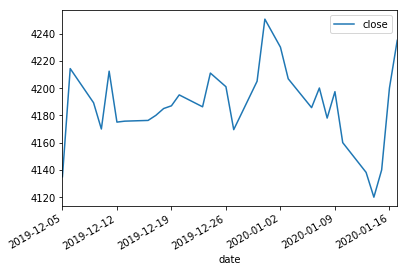

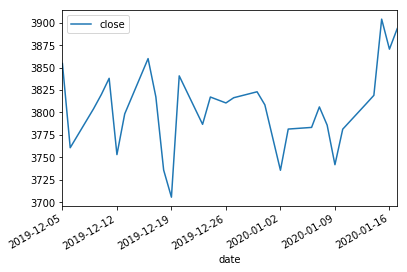

In [54]:
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
from matplotlib import style
from datetime import date


#remove if added to other code
today = str(date.today())


#names of biggest loser and gainer companies
loser = next(iter(losers.values()))[0].get('ticker')
gainer = next(iter(gainers.values()))[0].get('ticker')

#creates urls to access historical data of respective companies
loser_url = ("https://financialmodelingprep.com/api/v3/historical-price-full/"+ loser +"?timeseries=30")
gainer_url = ("https://financialmodelingprep.com/api/v3/historical-price-full/"+ gainer +"?timeseries=30")
names = ["loser", "gainer"]
c = 0

#creates respective graphs for the close values of the last 30 days of the companies and saves it as png
for i in loser_url, gainer_url:
    response = urlopen(i)
    data = response.read()
    hist = json.loads(data)
    hist.get("historical")
    df = pd.DataFrame(hist.get("historical"))
    df["date"] = pd.to_datetime(df["date"])
    df = df[["date","close"]].copy()
    df.set_index('date', inplace=True)
    df.plot()
    #uncomment next two rows if you dont want axes included in the graph
    #fig = plt.yticks([])
    #fig = plt.xticks([])
    fig = plt.gcf()
    savename = today + "_" + names[c] + "_plot.png"
    fig.savefig(savename, bbox_inches='tight')
    c =+ 1

